# matplotlib examples

In [20]:
import matplotlib.pyplot as plt

In [62]:
# dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris["data"]
y = iris["target"]
# species = [iris["target_names"][x] for x in y]

In [63]:
import pandas as pd
import numpy as np
feature_names = [x.replace(" (cm)", "") for x in iris["feature_names"]]
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [iris["target_names"][x] for x in y]

In [64]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# basic

# 各種グラフ

### 折れ線グラフ

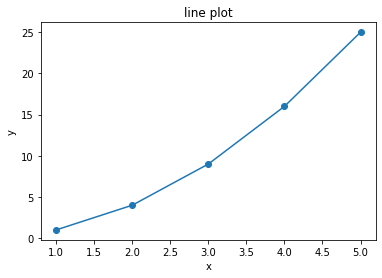

In [78]:
x = np.array([1,2,3,4,5])
y = x ** 2

plt.plot(x, y, marker="o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("line plot")
plt.show()

### 棒グラフ

In [69]:
mean = df.groupby("species")["sepal length"].mean().reset_index()
mean

,species,sepal length
0,setosa,5.006
1,versicolor,5.936
2,virginica,6.588


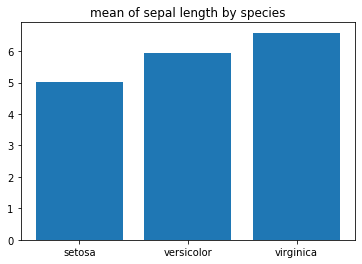

In [72]:
plt.bar(mean["species"], mean["sepal length"])
plt.title("mean of sepal length by species")
plt.show()

### 散布図

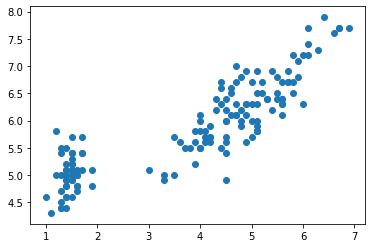

In [81]:
plt.scatter(df["petal length"], df["sepal length"])
plt.show()

## 層別

例えばカテゴリごとに散布図の点の色を塗り分ける場合は、カテゴリごとに別々のレイヤーの図を書く

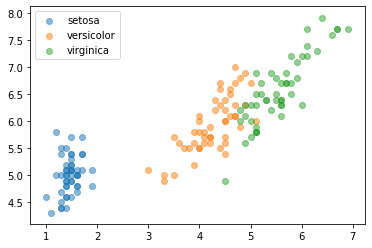

In [85]:
for species in df["species"].unique():
    is_species = (df["species"] == species)
    plt.scatter(df.loc[is_species,"petal length"], 
                df.loc[is_species, "sepal length"],
                alpha=0.5,  # 不透明度
                label=species)  # 凡例
plt.legend()  # 凡例を表示
plt.show()

# 2つの書き方

- matplotlibは2種類の記法がある
- 参考：[早く知っておきたかったmatplotlibの基礎知識、あるいは見た目の調整が捗るArtistの話 - Qiita](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

### 1. MATLAB style

MATLABで使われていた書き方

`matplotlib.pyplot`（下の例では`plt`） のメソッドを呼び出してレイヤーを重ねていく

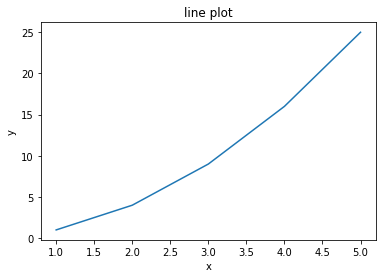

In [54]:
# 1. matlab style
x = np.array([1,2,3,4,5])
y = x ** 2
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("line plot")
plt.show()

### 2. OOP style

オブジェクト指向に則り、`AxesSubplot`（下の例では`ax`）でメソッドを呼び出していく

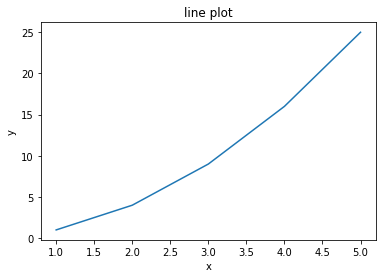

In [90]:
# 2. object oriented programming (OOP) style
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("line plot")
fig.show()

# 複数の図をプロットする

OOP styleでは、subplotを追加していき、複数の図を1枚の`Figure`にまとめられる

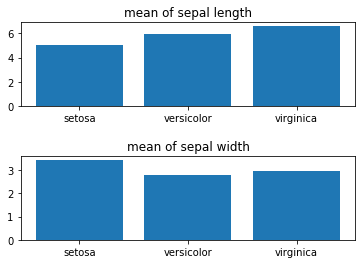

In [99]:
# data
mean_length = df.groupby("species")["sepal length"].mean().reset_index()
mean_width = df.groupby("species")["sepal width"].mean().reset_index()

# plot
fig = plt.figure()
fig.subplots_adjust(hspace=0.6)  # subplotの間隔の調整
ax1 = fig.add_subplot(2, 1, 1)  # nrows=2, ncols=1, index=1
ax1.bar(mean_length["species"], mean_length["sepal length"])
ax1.set_title("mean of sepal length")
ax2 = fig.add_subplot(2, 1, 2)  # nrows=2, ncols=1, index=2
ax2.bar(mean_width["species"], mean_width["sepal width"])
ax2.set_title("mean of sepal width")
fig.show()

### 異なるサイズの複数の図を入れる

複数の図を入れる時、等しいサイズでなく、これとなるサイズの比で入れたいときは`.add_gridspec()`を使う

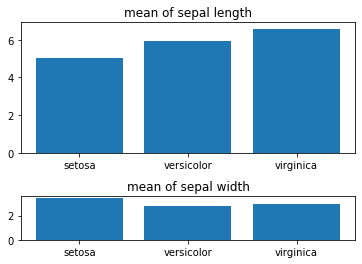

In [104]:
# data
mean_length = df.groupby("species")["sepal length"].mean().reset_index()
mean_width = df.groupby("species")["sepal width"].mean().reset_index()

# plot
fig = plt.figure()
fig.subplots_adjust(hspace=1)  # subplotの間隔の調整
grid = fig.add_gridspec(nrows=3, ncols=1)
ax1 = fig.add_subplot(grid[0:2, 0])  # nrows=[1,2], ncols=1
ax1.bar(mean_length["species"], mean_length["sepal length"])
ax1.set_title("mean of sepal length")
ax2 = fig.add_subplot(grid[2, 0])  # nrows=3, ncols=1
ax2.bar(mean_width["species"], mean_width["sepal width"])
ax2.set_title("mean of sepal width")
fig.show()

# 2つのY軸をもつ図

`ax.twinx()`を使う

この場合の凡例の位置をいい感じにする方法がわからない…

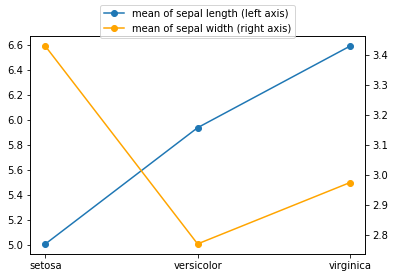

In [112]:
# data
mean_length = df.groupby("species")["sepal length"].mean().reset_index()
mean_width = df.groupby("species")["sepal width"].mean().reset_index()

# plot
fig = plt.figure()
ax1 = fig.add_subplot(111) # nrows=1, ncols=1, index=1
ax1.plot(mean_length["species"], mean_length["sepal length"],
         label="mean of sepal length (left axis)",
         marker="o")
ax2 = ax1.twinx()
ax2.plot(mean_width["species"], mean_width["sepal width"],
         label="mean of sepal width (right axis)",
         color="orange",
         marker="o")
fig.legend(loc="upper center")
fig.show()

# 軸ラベルの表記を変える

[The default tick formatter — Matplotlib 3.2.1 documentation](https://matplotlib.org/3.2.1/gallery/ticks_and_spines/scalarformatter.html#sphx-glr-gallery-ticks-and-spines-scalarformatter-py)

[Tick formatters — Matplotlib 3.2.1 documentation](https://matplotlib.org/3.2.1/gallery/ticks_and_spines/tick-formatters.html)

## ticklabel_format

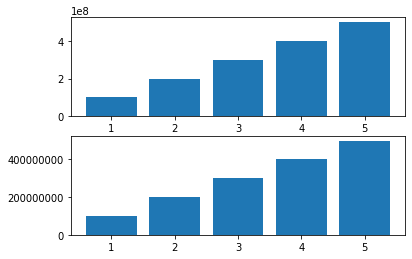

In [154]:
# data
x = np.array([1, 2, 3, 4, 5])
y = x * 100_000_000

# plot
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].bar(x, y)
axes[1].bar(x, y)
axes[1].ticklabel_format(style="plain")

## set_major_formatter

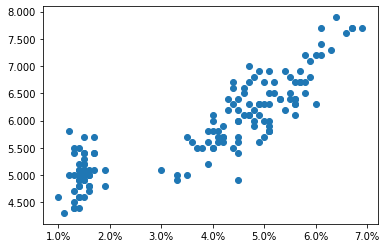

In [149]:
import matplotlib.ticker as ticker
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df["petal length"], df["sepal length"])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
fig.show()